In [15]:
pip install biosignalsnotebooks

In [16]:
# biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax
from scipy.integrate import cumtrapz
from scipy.signal import welch, firwin, freqz, iirfilter, iirnotch
import bokeh as bk
from scipy.signal import butter, lfilter
from scipy.stats import linregress
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
from math import log10
import pywt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
plt.style.use("ggplot")
#Estilo de ploteo

##OBTENCIÓN DEL DATASET


In [6]:
signal_chirre_scrolling = np.genfromtxt("/content/drive/MyDrive/ISB/EMG/Scrolling_chirre.txt", delimiter="\t",skip_header = 1)

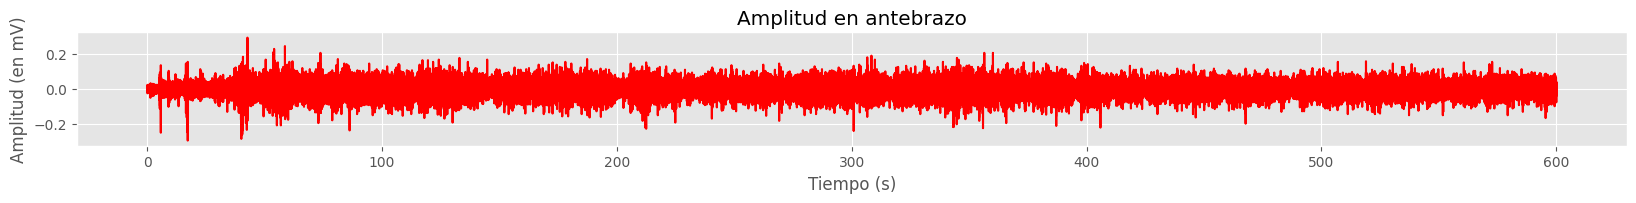

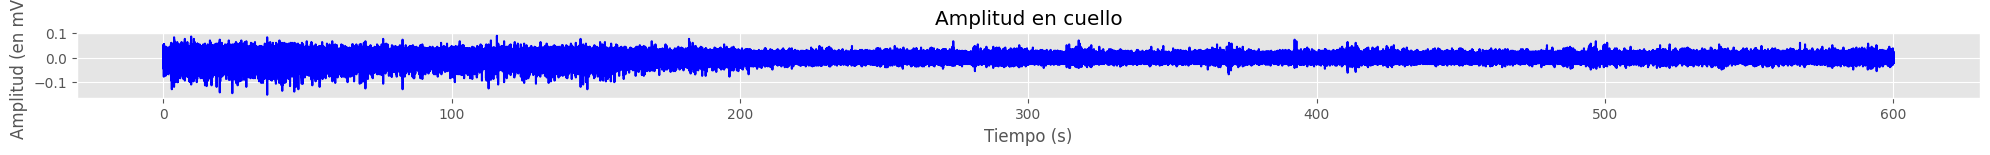

In [27]:
Fs = 1000
Ts = 1/Fs
y_antebrazo = signal_chirre_scrolling[: ,-2]
time_antebrazo = bsnb.generate_time(y_antebrazo, Fs)

y_cuello = signal_chirre_scrolling[: ,-1]
time_cuello = bsnb.generate_time(y_cuello, Fs)

#Transformacion de mV
bits = 10 # Bits de la salida
volt_range = 3.28 #Rango de voltaje en milivoltios (-1.64; 1.64) mV

y_antebrazo = (y_antebrazo * volt_range/(2**bits - 1)) # convertir los bits a mV
y_antebrazo = y_antebrazo - np.mean(y_antebrazo) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello = (y_cuello * volt_range/(2**bits - 1)) # convertir los bits a mV
y_cuello = y_cuello - np.mean(y_cuello) # Centrar la señal, ya que va de -1.64 a 1.64

plt.figure(figsize=(20, 5))
plt.subplot(3, 1, 1); plt.plot(time_antebrazo, y_antebrazo, "r"); plt.xlabel("Tiempo (s)"); plt.title("Amplitud en antebrazo");
plt.ylabel("Amplitud (en mV)");
plt.figure(figsize=(20, 5))
plt.subplot(4, 1, 1); plt.plot(time_cuello, y_cuello, "b"); plt.xlabel("Tiempo (s)"); plt.title("Amplitud en cuello");
plt.ylabel("Amplitud (en mV)");
fig = plt.gcf();
plt.tight_layout();
fig.set_facecolor('white');
plt.savefig('complete_signal.png', transparent=False, );
plt.show();

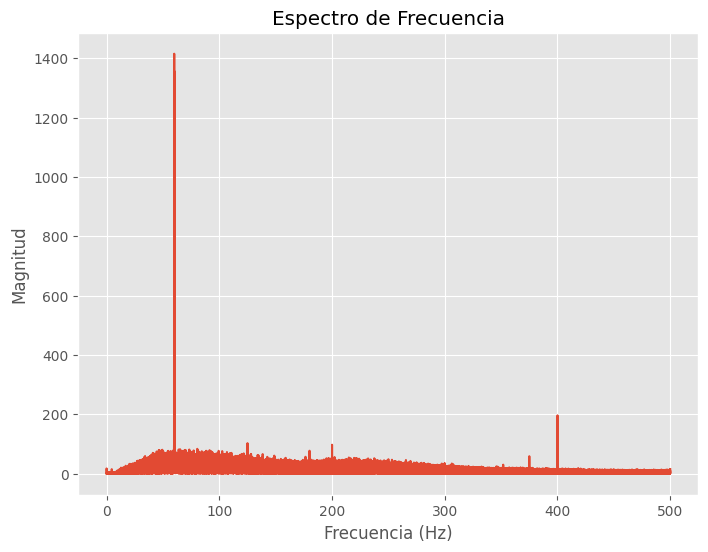

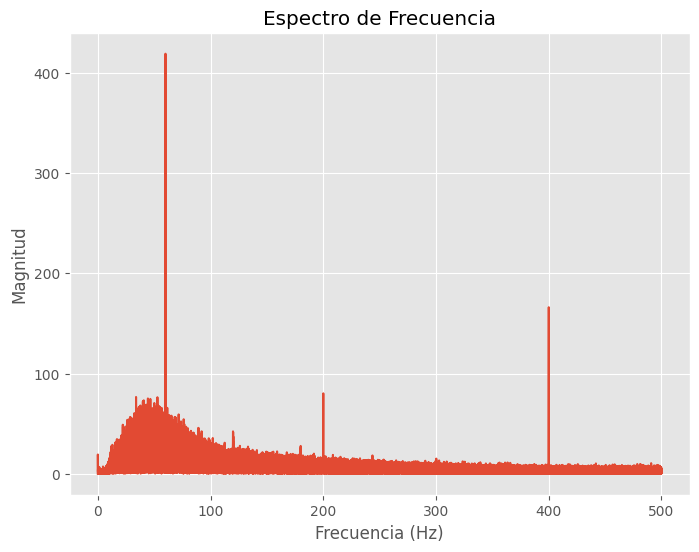

In [12]:
# Aplicar la Transformada de Fourier
fft_antebrazo = np.fft.fft(y_antebrazo)
fft_cuello = np.fft.fft(y_cuello)

# Obtener las frecuencias correspondientes
frecuencias_antebrazo = np.fft.fftfreq(len(y_antebrazo), 1/Fs)
frecuencias_cuello = np.fft.fftfreq(len(y_cuello), 1/Fs)

# Visualizar el espectro de frecuencia (magnitud)
plt.figure(figsize=(8, 6))
plt.plot(frecuencias_antebrazo[:len(y_antebrazo)//2], np.abs(fft_antebrazo[:len(y_antebrazo)//2]))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# Visualizar el espectro de frecuencia (magnitud)
plt.figure(figsize=(8, 6))
plt.plot(frecuencias_cuello[:len(y_cuello)//2], np.abs(fft_cuello[:len(y_cuello)//2]))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

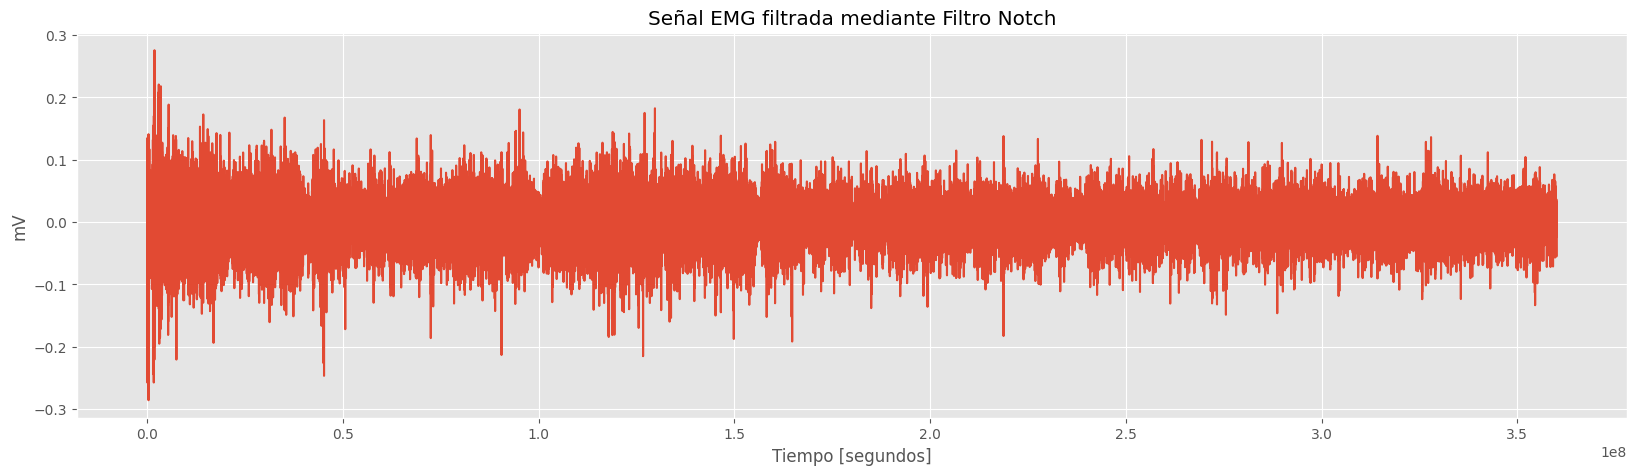

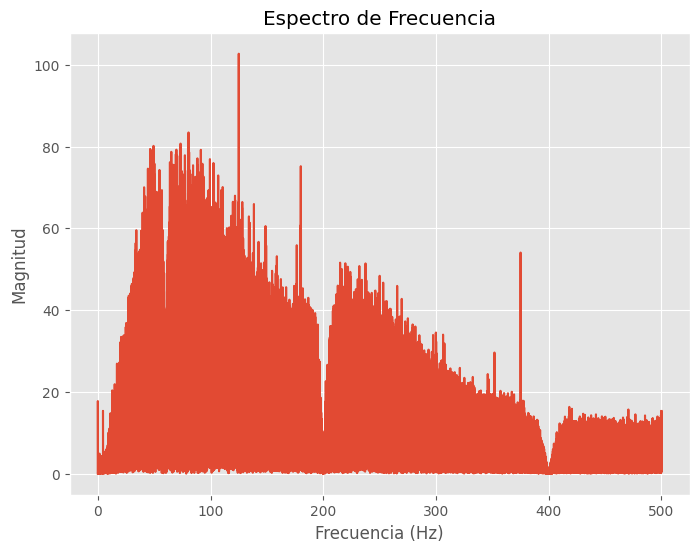

In [13]:
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y_antebrazo)
#y = lfilter(b, a, y)

f0 = 200.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)

f0 = 400.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)

señal_antebrazo = y
n = len(señal_antebrazo)
t = np.arange(0,0+n,1)*time_antebrazo
plt.figure(figsize=(20,5))
plt.plot(t, señal_antebrazo)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante Filtro Notch")

# Aplicar la Transformada de Fourier
fft_antebrazo = np.fft.fft(señal_antebrazo)

# Obtener las frecuencias correspondientes
frecuencias_antebrazo = np.fft.fftfreq(len(señal_antebrazo), 1/Fs)

# Visualizar el espectro de frecuencia (magnitud)
plt.figure(figsize=(8, 6))
plt.plot(frecuencias_antebrazo[:len(señal_antebrazo)//2], np.abs(fft_antebrazo[:len(señal_antebrazo)//2]))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

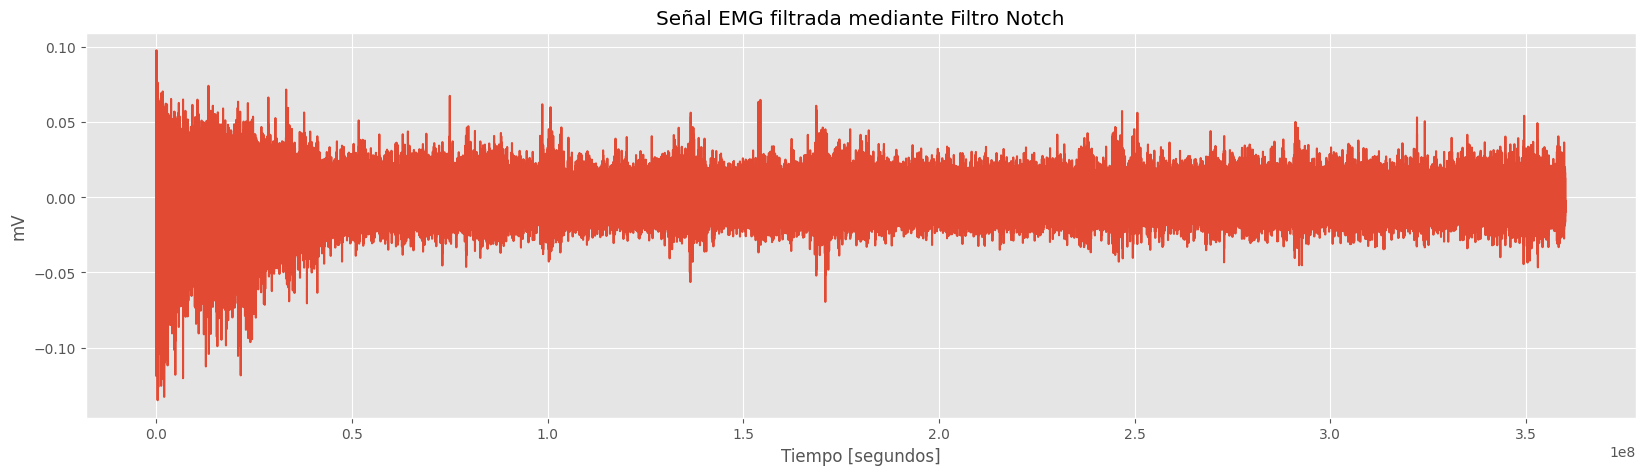

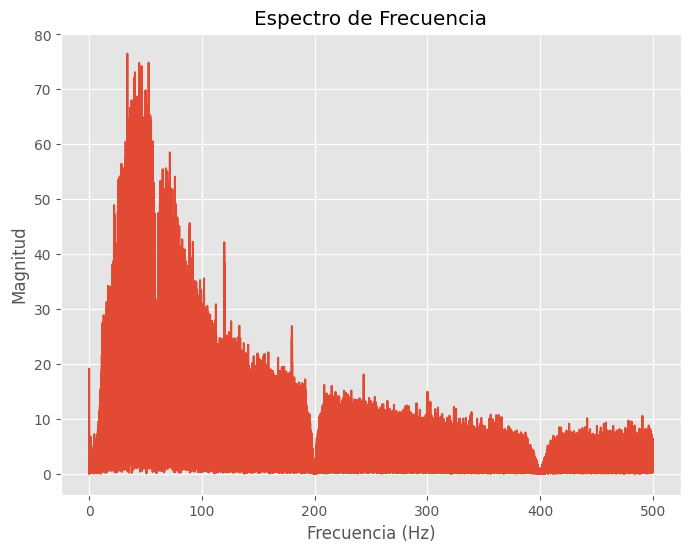

In [14]:
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y_cuello)
#y = lfilter(b, a, y)

f0 = 200.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)

f0 = 400.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)

señal_cuello = y
n = len(señal_cuello)
t = np.arange(0,0+n,1)*time_cuello
plt.figure(figsize=(20,5))
plt.plot(t, señal_cuello)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante Filtro Notch")

# Aplicar la Transformada de Fourier
fft_cuello = np.fft.fft(señal_cuello)

# Obtener las frecuencias correspondientes
frecuencias_cuello = np.fft.fftfreq(len(señal_cuello), 1/Fs)

# Visualizar el espectro de frecuencia (magnitud)
plt.figure(figsize=(8, 6))
plt.plot(frecuencias_cuello[:len(señal_cuello)//2], np.abs(fft_cuello[:len(señal_cuello)//2]))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

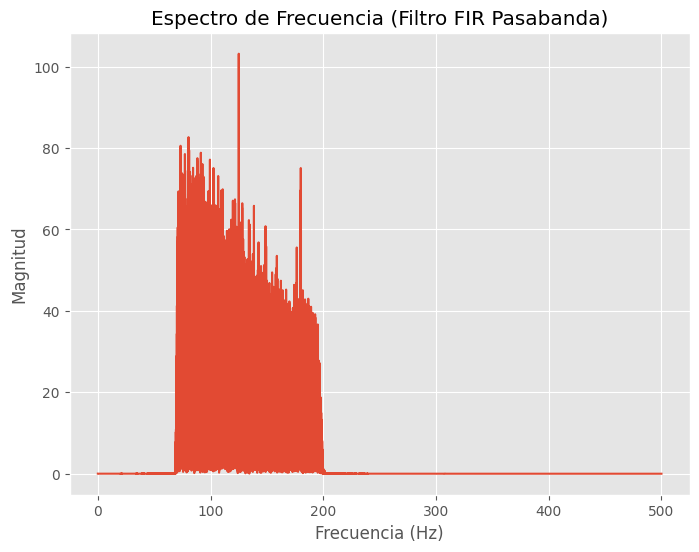

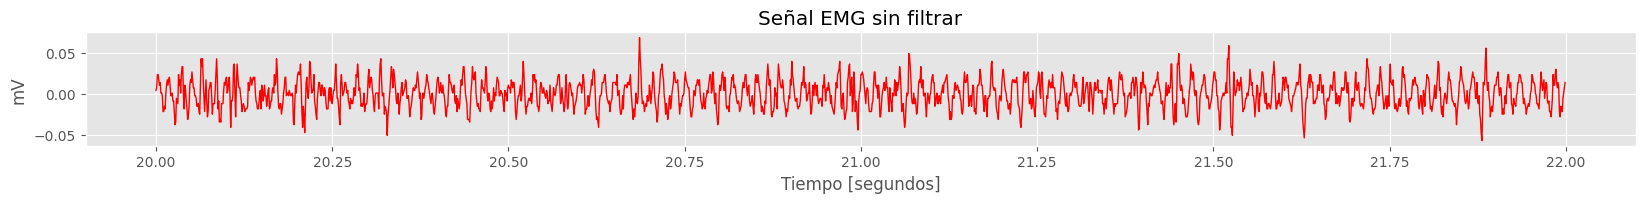

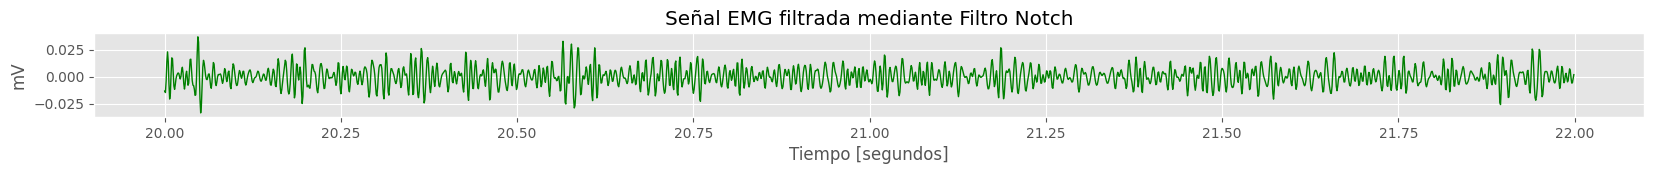

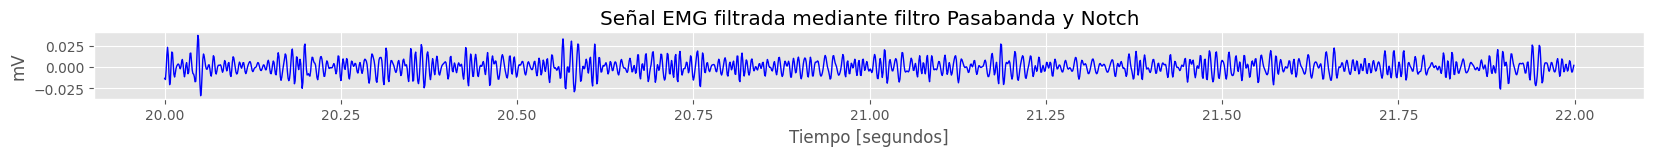

In [23]:
frecuencia_corte_baja = 70.0
frecuencia_corte_alta = 200.0
num_taps = 1001  # Número de coeficientes del filtro

# Filtro Pasabanda FIR
fir_filter_pasabanda_antebrazo = firwin(num_taps, [frecuencia_corte_baja, frecuencia_corte_alta], pass_zero=False, fs=Fs)
emg_fir_pasabanda_antebrazo = lfilter(fir_filter_pasabanda_antebrazo, 1.0, señal_antebrazo)

# Aplicar la Transformada de Fourier a la señal filtrada con el filtro FIR
fft_emg_fir_pasabanda_antebrazo = np.fft.fft(emg_fir_pasabanda_antebrazo)

# Obtener las frecuencias correspondientes
frecuencias_fir_pasabanda_antebrazo = np.fft.fftfreq(len(emg_fir_pasabanda_antebrazo), 1/Fs)

# Visualizar el espectro de frecuencia (magnitud) de la señal filtrada con FIR
plt.figure(figsize=(8, 6))
plt.plot(frecuencias_fir_pasabanda_antebrazo[:len(emg_fir_pasabanda_antebrazo)//2], np.abs(fft_emg_fir_pasabanda_antebrazo[:len(emg_fir_pasabanda_antebrazo)//2]))
plt.title('Espectro de Frecuencia (Filtro FIR Pasabanda)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 20
fin_segundo = 22
inicio_muestra = int(inicio_segundo * Fs)
fin_muestra = int(fin_segundo * Fs)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(20, 5))
plt.subplot(3, 1, 1)
plt.plot(time_antebrazo[inicio_muestra:fin_muestra], y_antebrazo[inicio_muestra:fin_muestra], lw=1, color='red')
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG sin filtrar")
plt.grid(True)

plt.figure(figsize=(20, 5))
plt.subplot(4, 1, 1)
plt.plot(time_antebrazo[inicio_muestra:fin_muestra], emg_fir_pasabanda_antebrazo[inicio_muestra:fin_muestra], lw=1, color='green')
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante Filtro Notch")
plt.grid(True)

plt.figure(figsize=(20, 5))
plt.subplot(5, 1, 1)
plt.plot(time_antebrazo[inicio_muestra:fin_muestra], emg_fir_pasabanda_antebrazo[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante filtro Pasabanda y Notch")
plt.grid(True)


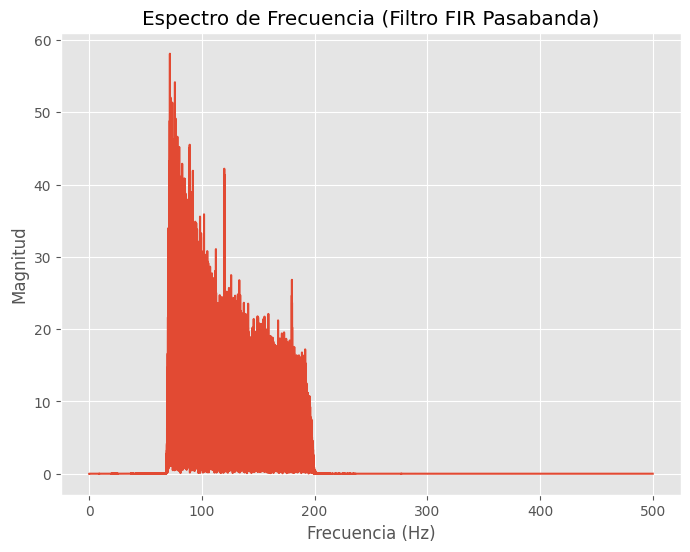

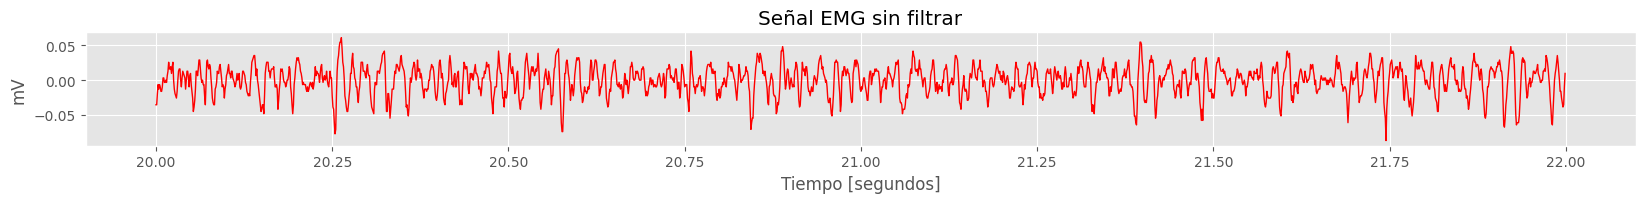

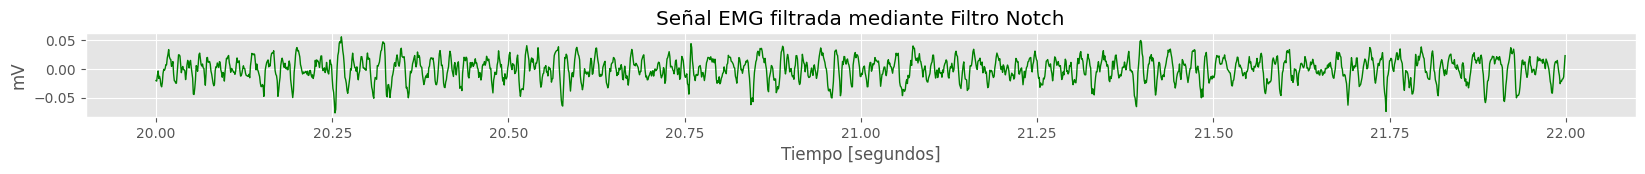

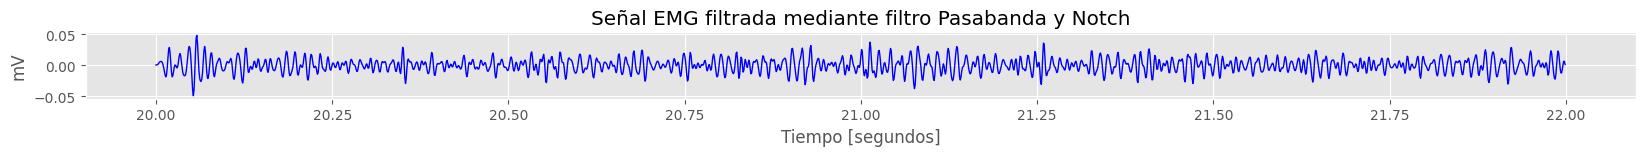

In [24]:
# Filtro Pasabanda FIR
fir_filter_pasabanda_cuello = firwin(num_taps, [frecuencia_corte_baja, frecuencia_corte_alta], pass_zero=False, fs=Fs)
emg_fir_pasabanda_cuello = lfilter(fir_filter_pasabanda_cuello, 1.0, señal_cuello)

# Aplicar la Transformada de Fourier a la señal filtrada con el filtro FIR
fft_emg_fir_pasabanda_cuello = np.fft.fft(emg_fir_pasabanda_cuello)

# Obtener las frecuencias correspondientes
frecuencias_fir_pasabanda_cuello = np.fft.fftfreq(len(emg_fir_pasabanda_cuello), 1/Fs)

# Visualizar el espectro de frecuencia (magnitud) de la señal filtrada con FIR
plt.figure(figsize=(8, 6))
plt.plot(frecuencias_fir_pasabanda_cuello[:len(emg_fir_pasabanda_cuello)//2], np.abs(fft_emg_fir_pasabanda_cuello[:len(emg_fir_pasabanda_cuello)//2]))
plt.title('Espectro de Frecuencia (Filtro FIR Pasabanda)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 20
fin_segundo = 22
inicio_muestra = int(inicio_segundo * Fs)
fin_muestra = int(fin_segundo * Fs)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(20, 5))
plt.subplot(3, 1, 1)
plt.plot(time_cuello[inicio_muestra:fin_muestra], y_cuello[inicio_muestra:fin_muestra], lw=1, color='red')
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG sin filtrar")
plt.grid(True)

plt.figure(figsize=(20, 5))
plt.subplot(4, 1, 1)
plt.plot(time_cuello[inicio_muestra:fin_muestra], señal_cuello[inicio_muestra:fin_muestra], lw=1, color='green')
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante Filtro Notch")
plt.grid(True)

plt.figure(figsize=(20, 5))
plt.subplot(5, 1, 1)
plt.plot(time_cuello[inicio_muestra:fin_muestra], emg_fir_pasabanda_cuello[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante filtro Pasabanda y Notch")
plt.grid(True)

# **Clasificación de data**

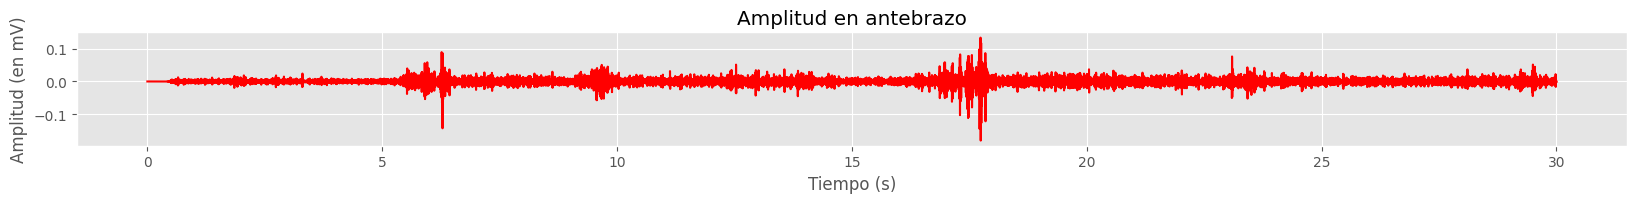

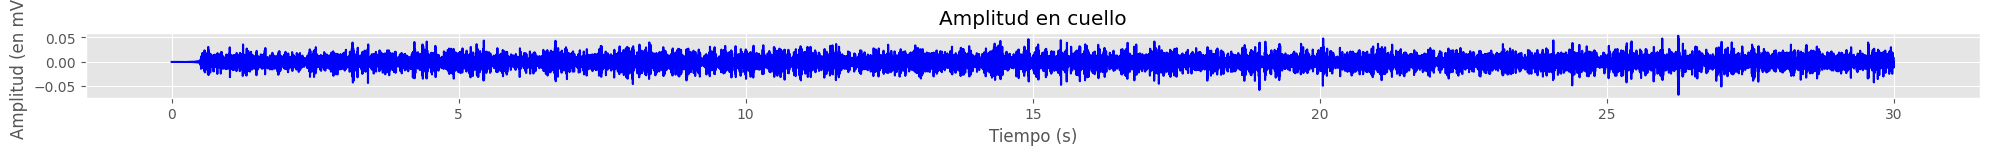

In [26]:
y_antebrazo_1=emg_fir_pasabanda_antebrazo[0:30000];
y_antebrazo_2=emg_fir_pasabanda_antebrazo[30000:60000];
y_antebrazo_3=emg_fir_pasabanda_antebrazo[60000:90000];
y_antebrazo_4=emg_fir_pasabanda_antebrazo[90000:120000];
y_antebrazo_5=emg_fir_pasabanda_antebrazo[120000:150000];
y_antebrazo_6=emg_fir_pasabanda_antebrazo[150000:180000];
y_antebrazo_7=emg_fir_pasabanda_antebrazo[180000:210000];
y_antebrazo_8=emg_fir_pasabanda_antebrazo[210000:240000];
y_antebrazo_9=emg_fir_pasabanda_antebrazo[240000:270000];
y_antebrazo_10=emg_fir_pasabanda_antebrazo[270000:300000];
y_antebrazo_11=emg_fir_pasabanda_antebrazo[300000:330000];
y_antebrazo_12=emg_fir_pasabanda_antebrazo[330000:360000];
y_antebrazo_13=emg_fir_pasabanda_antebrazo[360000:390000];
y_antebrazo_14=emg_fir_pasabanda_antebrazo[390000:420000];
y_antebrazo_15=emg_fir_pasabanda_antebrazo[420000:450000];
y_antebrazo_16=emg_fir_pasabanda_antebrazo[450000:480000];
y_antebrazo_17=emg_fir_pasabanda_antebrazo[480000:510000];
y_antebrazo_18=emg_fir_pasabanda_antebrazo[510000:540000];
y_antebrazo_19=emg_fir_pasabanda_antebrazo[540000:570000];
y_antebrazo_20=emg_fir_pasabanda_antebrazo[570000:600000];
time_antebrazo_1 = bsnb.generate_time(y_antebrazo_1, Fs)

y_cuello_1=emg_fir_pasabanda_cuello[0:30000];
y_cuello_2=emg_fir_pasabanda_cuello[30000:60000];
y_cuello_3=emg_fir_pasabanda_cuello[60000:90000];
y_cuello_4=emg_fir_pasabanda_cuello[90000:120000];
y_cuello_5=emg_fir_pasabanda_cuello[120000:150000];
y_cuello_6=emg_fir_pasabanda_cuello[150000:180000];
y_cuello_7=emg_fir_pasabanda_cuello[180000:210000];
y_cuello_8=emg_fir_pasabanda_cuello[210000:240000];
y_cuello_9=emg_fir_pasabanda_cuello[240000:270000];
y_cuello_10=emg_fir_pasabanda_cuello[270000:300000];
y_cuello_11=emg_fir_pasabanda_cuello[300000:330000];
y_cuello_12=emg_fir_pasabanda_cuello[330000:360000];
y_cuello_13=emg_fir_pasabanda_cuello[360000:390000];
y_cuello_14=emg_fir_pasabanda_cuello[390000:420000];
y_cuello_15=emg_fir_pasabanda_cuello[420000:450000];
y_cuello_16=emg_fir_pasabanda_cuello[450000:480000];
y_cuello_17=emg_fir_pasabanda_cuello[480000:510000];
y_cuello_18=emg_fir_pasabanda_cuello[510000:540000];
y_cuello_19=emg_fir_pasabanda_cuello[540000:570000];
y_cuello_20=emg_fir_pasabanda_cuello[570000:600000];
time_cuello_1 = bsnb.generate_time(y_cuello_1, Fs)

#Transformacion de mV
bits = 10 # Bits de la salida
volt_range = 3.28 #Rango de voltaje en milivoltios (-1.64; 1.64) mV

y_antebrazo_1 = y_antebrazo_1 - np.mean(y_antebrazo_1) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_2 = y_antebrazo_2 - np.mean(y_antebrazo_2) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_3 = y_antebrazo_3 - np.mean(y_antebrazo_3) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_4 = y_antebrazo_4 - np.mean(y_antebrazo_4) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_5 = y_antebrazo_5 - np.mean(y_antebrazo_5) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_6 = y_antebrazo_6 - np.mean(y_antebrazo_6) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_7 = y_antebrazo_7 - np.mean(y_antebrazo_7) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_8 = y_antebrazo_8 - np.mean(y_antebrazo_8) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_9 = y_antebrazo_9 - np.mean(y_antebrazo_9) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_10 = y_antebrazo_10 - np.mean(y_antebrazo_10) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_11 = y_antebrazo_11 - np.mean(y_antebrazo_11) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_12 = y_antebrazo_12 - np.mean(y_antebrazo_12) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_13 = y_antebrazo_13 - np.mean(y_antebrazo_13) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_14 = y_antebrazo_14 - np.mean(y_antebrazo_14) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_15 = y_antebrazo_15 - np.mean(y_antebrazo_15) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_16 = y_antebrazo_16 - np.mean(y_antebrazo_16) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_17 = y_antebrazo_17 - np.mean(y_antebrazo_17) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_18 = y_antebrazo_18 - np.mean(y_antebrazo_18) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_19 = y_antebrazo_19 - np.mean(y_antebrazo_19) # Centrar la señal, ya que va de -1.64 a 1.64
y_antebrazo_20 = y_antebrazo_20 - np.mean(y_antebrazo_20) # Centrar la señal, ya que va de -1.64 a 1.64

y_cuello_1 = y_cuello_1 - np.mean(y_cuello_1) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_2 = y_cuello_2 - np.mean(y_cuello_2) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_3 = y_cuello_3 - np.mean(y_cuello_3) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_4 = y_cuello_4 - np.mean(y_cuello_4) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_5 = y_cuello_5 - np.mean(y_cuello_5) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_6 = y_cuello_6 - np.mean(y_cuello_6) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_7 = y_cuello_7 - np.mean(y_cuello_7) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_8 = y_cuello_8 - np.mean(y_cuello_8) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_9 = y_cuello_9 - np.mean(y_cuello_9) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_10 = y_cuello_10 - np.mean(y_cuello_10) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_11 = y_cuello_11 - np.mean(y_cuello_11) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_12 = y_cuello_12 - np.mean(y_cuello_12) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_13 = y_cuello_13 - np.mean(y_cuello_13) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_14 = y_cuello_14 - np.mean(y_cuello_14) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_15 = y_cuello_15 - np.mean(y_cuello_15) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_16 = y_cuello_16 - np.mean(y_cuello_16) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_17 = y_cuello_17 - np.mean(y_cuello_17) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_18 = y_cuello_18 - np.mean(y_cuello_18) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_19 = y_cuello_19 - np.mean(y_cuello_19) # Centrar la señal, ya que va de -1.64 a 1.64
y_cuello_20 = y_cuello_20 - np.mean(y_cuello_20) # Centrar la señal, ya que va de -1.64 a 1.64

plt.figure(figsize=(20, 5))
plt.subplot(3, 1, 1); plt.plot(time_antebrazo_1, y_antebrazo_1, "r"); plt.xlabel("Tiempo (s)"); plt.title("Amplitud en antebrazo");
plt.ylabel("Amplitud (en mV)");
plt.figure(figsize=(20, 5))
plt.subplot(4, 1, 1); plt.plot(time_antebrazo_1, y_cuello_1, "b"); plt.xlabel("Tiempo (s)"); plt.title("Amplitud en cuello");
plt.ylabel("Amplitud (en mV)");

fig = plt.gcf();
plt.tight_layout();
fig.set_facecolor('white');
plt.savefig('complete_signal.png', transparent=False, );
plt.show();

##Filtro de la señal

Las señales EMG se suelen filtrar en el rango de 2-500 Hz, ya que se identifican como frecuencias relevantes en la actividad muscular

[1] L. Gila, A. Malanda, I. Rodríguez Carreño, J. Rodríguez Falces, y J. Navallas, “Métodos de procesamiento y análisis de señales electromiográficas”, An. Sist. Sanit. Navar., vol. 32, pp. 27–43, 2009.

##Detección de actividad musscular

In [28]:
burst_begin_antebrazo_1, burst_end_antebrazo_1 = bsnb.detect_emg_activations(y_antebrazo_1, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_1, burst_end_cuello_1 = bsnb.detect_emg_activations(y_cuello_1, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [31]:
burst_begin_antebrazo_2, burst_end_antebrazo_2 = bsnb.detect_emg_activations(y_antebrazo_2, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_2, burst_end_cuello_2 = bsnb.detect_emg_activations(y_cuello_2, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [32]:
burst_begin_antebrazo_3, burst_end_antebrazo_3 = bsnb.detect_emg_activations(y_antebrazo_3, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_3, burst_end_cuello_3 = bsnb.detect_emg_activations(y_cuello_3, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [33]:
burst_begin_antebrazo_4, burst_end_antebrazo_4 = bsnb.detect_emg_activations(y_antebrazo_4, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_4, burst_end_cuello_4 = bsnb.detect_emg_activations(y_cuello_4, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [34]:
burst_begin_antebrazo_5, burst_end_antebrazo_5 = bsnb.detect_emg_activations(y_antebrazo_5, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_5, burst_end_cuello_5 = bsnb.detect_emg_activations(y_cuello_5, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [35]:
burst_begin_antebrazo_6, burst_end_antebrazo_6 = bsnb.detect_emg_activations(y_antebrazo_6, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_6, burst_end_cuello_6 = bsnb.detect_emg_activations(y_cuello_6, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [36]:
burst_begin_antebrazo_7, burst_end_antebrazo_7 = bsnb.detect_emg_activations(y_antebrazo_7, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_7, burst_end_cuello_7 = bsnb.detect_emg_activations(y_cuello_7, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [37]:
burst_begin_antebrazo_8, burst_end_antebrazo_8 = bsnb.detect_emg_activations(y_antebrazo_8, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_8, burst_end_cuello_8 = bsnb.detect_emg_activations(y_cuello_8, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [38]:
burst_begin_antebrazo_9, burst_end_antebrazo_9 = bsnb.detect_emg_activations(y_antebrazo_9, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_9, burst_end_cuello_9 = bsnb.detect_emg_activations(y_cuello_9, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [39]:
burst_begin_antebrazo_10, burst_end_antebrazo_10 = bsnb.detect_emg_activations(y_antebrazo_10, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_10, burst_end_cuello_10 = bsnb.detect_emg_activations(y_cuello_10, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [40]:
burst_begin_antebrazo_11, burst_end_antebrazo_11 = bsnb.detect_emg_activations(y_antebrazo_11, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_11, burst_end_cuello_11 = bsnb.detect_emg_activations(y_cuello_11, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [41]:
burst_begin_antebrazo_12, burst_end_antebrazo_12 = bsnb.detect_emg_activations(y_antebrazo_12, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_12, burst_end_cuello_12 = bsnb.detect_emg_activations(y_cuello_12, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [42]:
burst_begin_antebrazo_13, burst_end_antebrazo_13 = bsnb.detect_emg_activations(y_antebrazo_13, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_13, burst_end_cuello_13 = bsnb.detect_emg_activations(y_cuello_13, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [43]:
burst_begin_antebrazo_14, burst_end_antebrazo_14 = bsnb.detect_emg_activations(y_antebrazo_14, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_14, burst_end_cuello_14 = bsnb.detect_emg_activations(y_cuello_14, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [44]:
burst_begin_antebrazo_15, burst_end_antebrazo_15 = bsnb.detect_emg_activations(y_antebrazo_15, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_15, burst_end_cuello_15 = bsnb.detect_emg_activations(y_cuello_15, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [45]:
burst_begin_antebrazo_16, burst_end_antebrazo_16 = bsnb.detect_emg_activations(y_antebrazo_16, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_16, burst_end_cuello_16 = bsnb.detect_emg_activations(y_cuello_16, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [46]:
burst_begin_antebrazo_17, burst_end_antebrazo_17 = bsnb.detect_emg_activations(y_antebrazo_17, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_17, burst_end_cuello_17 = bsnb.detect_emg_activations(y_cuello_17, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [47]:
burst_begin_antebrazo_18, burst_end_antebrazo_18 = bsnb.detect_emg_activations(y_antebrazo_18, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_18, burst_end_cuello_18 = bsnb.detect_emg_activations(y_cuello_18, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [48]:
burst_begin_antebrazo_19, burst_end_antebrazo_19 = bsnb.detect_emg_activations(y_antebrazo_19, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_19, burst_end_cuello_19 = bsnb.detect_emg_activations(y_cuello_19, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [49]:
burst_begin_antebrazo_20, burst_end_antebrazo_20 = bsnb.detect_emg_activations(y_antebrazo_20, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]
burst_begin_cuello_20, burst_end_cuello_20 = bsnb.detect_emg_activations(y_cuello_20, Fs, smooth_level=20, threshold_level=10,
                                                     time_units=True, plot_result=True)[:2]

Output hidden; open in https://colab.research.google.com to view.

In [50]:
# Bursts Duration
bursts_time_antebrazo_1 = burst_end_antebrazo_1 - burst_begin_antebrazo_1
bursts_time_antebrazo_2 = burst_end_antebrazo_2 - burst_begin_antebrazo_2
bursts_time_antebrazo_3 = burst_end_antebrazo_3 - burst_begin_antebrazo_3
bursts_time_antebrazo_4 = burst_end_antebrazo_4 - burst_begin_antebrazo_4
bursts_time_antebrazo_5 = burst_end_antebrazo_5 - burst_begin_antebrazo_5
bursts_time_antebrazo_6 = burst_end_antebrazo_6 - burst_begin_antebrazo_6
bursts_time_antebrazo_7 = burst_end_antebrazo_7 - burst_begin_antebrazo_7
bursts_time_antebrazo_8= burst_end_antebrazo_8 - burst_begin_antebrazo_8
bursts_time_antebrazo_9 = burst_end_antebrazo_9 - burst_begin_antebrazo_9
bursts_time_antebrazo_10 = burst_end_antebrazo_10 - burst_begin_antebrazo_10
bursts_time_antebrazo_11 = burst_end_antebrazo_11 - burst_begin_antebrazo_11
bursts_time_antebrazo_12 = burst_end_antebrazo_12 - burst_begin_antebrazo_12
bursts_time_antebrazo_13 = burst_end_antebrazo_13 - burst_begin_antebrazo_13
bursts_time_antebrazo_14 = burst_end_antebrazo_14 - burst_begin_antebrazo_14
bursts_time_antebrazo_15 = burst_end_antebrazo_15 - burst_begin_antebrazo_15
bursts_time_antebrazo_16 = burst_end_antebrazo_16 - burst_begin_antebrazo_16
bursts_time_antebrazo_17 = burst_end_antebrazo_17 - burst_begin_antebrazo_17
bursts_time_antebrazo_18= burst_end_antebrazo_18 - burst_begin_antebrazo_18
bursts_time_antebrazo_19 = burst_end_antebrazo_19 - burst_begin_antebrazo_19
bursts_time_antebrazo_20 = burst_end_antebrazo_20 - burst_begin_antebrazo_20
bursts_time_cuello_1 = burst_end_cuello_1 - burst_begin_cuello_1
bursts_time_cuello_2 = burst_end_cuello_2 - burst_begin_cuello_2
bursts_time_cuello_3 = burst_end_cuello_3 - burst_begin_cuello_3
bursts_time_cuello_4 = burst_end_cuello_4 - burst_begin_cuello_4
bursts_time_cuello_5 = burst_end_cuello_1 - burst_begin_cuello_1
bursts_time_cuello_6 = burst_end_cuello_1 - burst_begin_cuello_1
bursts_time_cuello_7 = burst_end_cuello_1 - burst_begin_cuello_1
bursts_time_cuello_8= burst_end_cuello_8 - burst_begin_cuello_8
bursts_time_cuello_9 = burst_end_cuello_9 - burst_begin_cuello_9
bursts_time_cuello_10 = burst_end_cuello_10 - burst_begin_cuello_10
bursts_time_cuello_11 = burst_end_cuello_11 - burst_begin_cuello_1
bursts_time_cuello_12 = burst_end_cuello_12 - burst_begin_cuello_2
bursts_time_cuello_13 = burst_end_cuello_13 - burst_begin_cuello_3
bursts_time_cuello_14 = burst_end_cuello_14 - burst_begin_cuello_4
bursts_time_cuello_15 = burst_end_cuello_15 - burst_begin_cuello_1
bursts_time_cuello_16 = burst_end_cuello_16 - burst_begin_cuello_1
bursts_time_cuello_17 = burst_end_cuello_1 - burst_begin_cuello_1
bursts_time_cuello_18= burst_end_cuello_8 - burst_begin_cuello_8
bursts_time_cuello_19 = burst_end_cuello_9 - burst_begin_cuello_9
bursts_time_cuello_20 = burst_end_cuello_20 - burst_begin_cuello_10

# Parameter extraction
max_time_antebrazo_1 = max(bursts_time_antebrazo_1)
min_time_antebrazo_1 = min(bursts_time_antebrazo_1)
avg_time_antebrazo_1 = average(bursts_time_antebrazo_1)
std_time_antebrazo_1 = std(bursts_time_antebrazo_1)
max_time_antebrazo_2 = max(bursts_time_antebrazo_2)
min_time_antebrazo_2 = min(bursts_time_antebrazo_2)
avg_time_antebrazo_2 = average(bursts_time_antebrazo_2)
std_time_antebrazo_2 = std(bursts_time_antebrazo_2)
max_time_antebrazo_3 = max(bursts_time_antebrazo_3)
min_time_antebrazo_3 = min(bursts_time_antebrazo_3)
avg_time_antebrazo_3 = average(bursts_time_antebrazo_3)
std_time_antebrazo_3 = std(bursts_time_antebrazo_3)
max_time_antebrazo_4 = max(bursts_time_antebrazo_4)
min_time_antebrazo_4 = min(bursts_time_antebrazo_4)
avg_time_antebrazo_4 = average(bursts_time_antebrazo_4)
std_time_antebrazo_4 = std(bursts_time_antebrazo_4)
max_time_antebrazo_5 = max(bursts_time_antebrazo_5)
min_time_antebrazo_5 = min(bursts_time_antebrazo_5)
avg_time_antebrazo_5 = average(bursts_time_antebrazo_5)
std_time_antebrazo_5 = std(bursts_time_antebrazo_5)
max_time_antebrazo_6 = max(bursts_time_antebrazo_6)
min_time_antebrazo_6 = min(bursts_time_antebrazo_6)
avg_time_antebrazo_6 = average(bursts_time_antebrazo_6)
std_time_antebrazo_6 = std(bursts_time_antebrazo_6)
max_time_antebrazo_7 = max(bursts_time_antebrazo_7)
min_time_antebrazo_7 = min(bursts_time_antebrazo_7)
avg_time_antebrazo_7 = average(bursts_time_antebrazo_7)
std_time_antebrazo_7 = std(bursts_time_antebrazo_7)
max_time_antebrazo_8 = max(bursts_time_antebrazo_8)
min_time_antebrazo_8 = min(bursts_time_antebrazo_8)
avg_time_antebrazo_8 = average(bursts_time_antebrazo_8)
std_time_antebrazo_8 = std(bursts_time_antebrazo_8)
max_time_antebrazo_9 = max(bursts_time_antebrazo_9)
min_time_antebrazo_9 = min(bursts_time_antebrazo_9)
avg_time_antebrazo_9 = average(bursts_time_antebrazo_9)
std_time_antebrazo_9 = std(bursts_time_antebrazo_9)
max_time_antebrazo_10 = max(bursts_time_antebrazo_10)
min_time_antebrazo_10 = min(bursts_time_antebrazo_10)
avg_time_antebrazo_10 = average(bursts_time_antebrazo_10)
std_time_antebrazo_10 = std(bursts_time_antebrazo_10)
max_time_antebrazo_11 = max(bursts_time_antebrazo_11)
min_time_antebrazo_11 = min(bursts_time_antebrazo_11)
avg_time_antebrazo_11 = average(bursts_time_antebrazo_11)
std_time_antebrazo_11 = std(bursts_time_antebrazo_11)
max_time_antebrazo_12 = max(bursts_time_antebrazo_12)
min_time_antebrazo_12 = min(bursts_time_antebrazo_12)
avg_time_antebrazo_12 = average(bursts_time_antebrazo_12)
std_time_antebrazo_12 = std(bursts_time_antebrazo_12)
max_time_antebrazo_13 = max(bursts_time_antebrazo_13)
min_time_antebrazo_13 = min(bursts_time_antebrazo_13)
avg_time_antebrazo_13 = average(bursts_time_antebrazo_13)
std_time_antebrazo_13 = std(bursts_time_antebrazo_13)
max_time_antebrazo_14 = max(bursts_time_antebrazo_14)
min_time_antebrazo_14 = min(bursts_time_antebrazo_14)
avg_time_antebrazo_14 = average(bursts_time_antebrazo_14)
std_time_antebrazo_14 = std(bursts_time_antebrazo_14)
max_time_antebrazo_15 = max(bursts_time_antebrazo_15)
min_time_antebrazo_15 = min(bursts_time_antebrazo_15)
avg_time_antebrazo_15 = average(bursts_time_antebrazo_15)
std_time_antebrazo_15 = std(bursts_time_antebrazo_15)
max_time_antebrazo_16 = max(bursts_time_antebrazo_16)
min_time_antebrazo_16 = min(bursts_time_antebrazo_16)
avg_time_antebrazo_16 = average(bursts_time_antebrazo_16)
std_time_antebrazo_16 = std(bursts_time_antebrazo_16)
max_time_antebrazo_17 = max(bursts_time_antebrazo_17)
min_time_antebrazo_17 = min(bursts_time_antebrazo_17)
avg_time_antebrazo_17 = average(bursts_time_antebrazo_17)
std_time_antebrazo_17 = std(bursts_time_antebrazo_17)
max_time_antebrazo_18 = max(bursts_time_antebrazo_18)
min_time_antebrazo_18 = min(bursts_time_antebrazo_18)
avg_time_antebrazo_18 = average(bursts_time_antebrazo_18)
std_time_antebrazo_18 = std(bursts_time_antebrazo_18)
max_time_antebrazo_19 = max(bursts_time_antebrazo_19)
min_time_antebrazo_19 = min(bursts_time_antebrazo_19)
avg_time_antebrazo_19 = average(bursts_time_antebrazo_19)
std_time_antebrazo_19 = std(bursts_time_antebrazo_19)
max_time_antebrazo_20 = max(bursts_time_antebrazo_20)
min_time_antebrazo_20 = min(bursts_time_antebrazo_20)
avg_time_antebrazo_20 = average(bursts_time_antebrazo_20)
std_time_antebrazo_20 = std(bursts_time_antebrazo_20)

max_time_cuello_1 = max(bursts_time_cuello_1)
min_time_cuello_1 = min(bursts_time_cuello_1)
avg_time_cuello_1 = average(bursts_time_cuello_1)
std_time_cuello_1 = std(bursts_time_cuello_1)
max_time_cuello_2 = max(bursts_time_cuello_2)
min_time_cuello_2 = min(bursts_time_cuello_2)
avg_time_cuello_2 = average(bursts_time_cuello_2)
std_time_cuello_2 = std(bursts_time_cuello_2)
max_time_cuello_3 = max(bursts_time_cuello_3)
min_time_cuello_3 = min(bursts_time_cuello_3)
avg_time_cuello_3 = average(bursts_time_cuello_3)
std_time_cuello_3 = std(bursts_time_cuello_3)
max_time_cuello_4 = max(bursts_time_cuello_4)
min_time_cuello_4 = min(bursts_time_cuello_4)
avg_time_cuello_4 = average(bursts_time_cuello_4)
std_time_cuello_4 = std(bursts_time_cuello_4)
max_time_cuello_5 = max(bursts_time_cuello_5)
min_time_cuello_5 = min(bursts_time_cuello_5)
avg_time_cuello_5 = average(bursts_time_cuello_5)
std_time_cuello_5 = std(bursts_time_cuello_5)
max_time_cuello_6 = max(bursts_time_cuello_6)
min_time_cuello_6 = min(bursts_time_cuello_6)
avg_time_cuello_6 = average(bursts_time_cuello_6)
std_time_cuello_6 = std(bursts_time_cuello_6)
max_time_cuello_7 = max(bursts_time_cuello_7)
min_time_cuello_7 = min(bursts_time_cuello_7)
avg_time_cuello_7 = average(bursts_time_cuello_7)
std_time_cuello_7 = std(bursts_time_cuello_7)
max_time_cuello_8 = max(bursts_time_cuello_8)
min_time_cuello_8 = min(bursts_time_cuello_8)
avg_time_cuello_8 = average(bursts_time_cuello_8)
std_time_cuello_8 = std(bursts_time_cuello_8)
max_time_cuello_9 = max(bursts_time_cuello_9)
min_time_cuello_9 = min(bursts_time_cuello_9)
avg_time_cuello_9 = average(bursts_time_cuello_9)
std_time_cuello_9 = std(bursts_time_cuello_9)
max_time_cuello_10 = max(bursts_time_cuello_10)
min_time_cuello_10 = min(bursts_time_cuello_10)
avg_time_cuello_10 = average(bursts_time_cuello_10)
std_time_cuello_10 = std(bursts_time_cuello_10)
max_time_cuello_11 = max(bursts_time_cuello_11)
min_time_cuello_11 = min(bursts_time_cuello_11)
avg_time_cuello_11 = average(bursts_time_cuello_11)
std_time_cuello_11 = std(bursts_time_cuello_11)
max_time_cuello_12 = max(bursts_time_cuello_12)
min_time_cuello_12 = min(bursts_time_cuello_12)
avg_time_cuello_12 = average(bursts_time_cuello_12)
std_time_cuello_12 = std(bursts_time_cuello_12)
max_time_cuello_13 = max(bursts_time_cuello_13)
min_time_cuello_13 = min(bursts_time_cuello_13)
avg_time_cuello_13 = average(bursts_time_cuello_13)
std_time_cuello_13 = std(bursts_time_cuello_13)
max_time_cuello_14 = max(bursts_time_cuello_14)
min_time_cuello_14 = min(bursts_time_cuello_14)
avg_time_cuello_14 = average(bursts_time_cuello_14)
std_time_cuello_14 = std(bursts_time_cuello_14)
max_time_cuello_15 = max(bursts_time_cuello_15)
min_time_cuello_15 = min(bursts_time_cuello_15)
avg_time_cuello_15 = average(bursts_time_cuello_15)
std_time_cuello_15 = std(bursts_time_cuello_15)
max_time_cuello_16 = max(bursts_time_cuello_16)
min_time_cuello_16 = min(bursts_time_cuello_16)
avg_time_cuello_16 = average(bursts_time_cuello_16)
std_time_cuello_16 = std(bursts_time_cuello_16)
max_time_cuello_17 = max(bursts_time_cuello_17)
min_time_cuello_17 = min(bursts_time_cuello_17)
avg_time_cuello_17 = average(bursts_time_cuello_17)
std_time_cuello_17 = std(bursts_time_cuello_17)
max_time_cuello_18 = max(bursts_time_cuello_18)
min_time_cuello_18 = min(bursts_time_cuello_18)
avg_time_cuello_18 = average(bursts_time_cuello_18)
std_time_cuello_18 = std(bursts_time_cuello_18)
max_time_cuello_19 = max(bursts_time_cuello_19)
min_time_cuello_19 = min(bursts_time_cuello_19)
avg_time_cuello_19 = average(bursts_time_cuello_19)
std_time_cuello_19 = std(bursts_time_cuello_19)
max_time_cuello_20 = max(bursts_time_cuello_20)
min_time_cuello_20 = min(bursts_time_cuello_20)
avg_time_cuello_20 = average(bursts_time_cuello_20)
std_time_cuello_20 = std(bursts_time_cuello_20)

# Maximum
max_sample_antebrazo_1 = max(y_antebrazo_1)
max_sample_antebrazo_2 = max(y_antebrazo_2)
max_sample_antebrazo_3 = max(y_antebrazo_3)
max_sample_antebrazo_4 = max(y_antebrazo_4)
max_sample_antebrazo_5 = max(y_antebrazo_5)
max_sample_antebrazo_6 = max(y_antebrazo_6)
max_sample_antebrazo_7 = max(y_antebrazo_7)
max_sample_antebrazo_8 = max(y_antebrazo_8)
max_sample_antebrazo_9 = max(y_antebrazo_9)
max_sample_antebrazo_10 = max(y_antebrazo_10)
max_sample_antebrazo_11 = max(y_antebrazo_11)
max_sample_antebrazo_12 = max(y_antebrazo_12)
max_sample_antebrazo_13 = max(y_antebrazo_13)
max_sample_antebrazo_14 = max(y_antebrazo_14)
max_sample_antebrazo_15 = max(y_antebrazo_15)
max_sample_antebrazo_16 = max(y_antebrazo_16)
max_sample_antebrazo_17 = max(y_antebrazo_17)
max_sample_antebrazo_18 = max(y_antebrazo_18)
max_sample_antebrazo_19 = max(y_antebrazo_19)
max_sample_antebrazo_20 = max(y_antebrazo_20)

max_sample_cuello_1 = max(y_cuello_1)
max_sample_cuello_2 = max(y_cuello_2)
max_sample_cuello_3 = max(y_cuello_3)
max_sample_cuello_4 = max(y_cuello_4)
max_sample_cuello_5 = max(y_cuello_5)
max_sample_cuello_6 = max(y_cuello_6)
max_sample_cuello_7 = max(y_cuello_7)
max_sample_cuello_8 = max(y_cuello_8)
max_sample_cuello_9 = max(y_cuello_9)
max_sample_cuello_10 = max(y_cuello_10)
max_sample_cuello_11 = max(y_cuello_11)
max_sample_cuello_12 = max(y_cuello_12)
max_sample_cuello_13 = max(y_cuello_13)
max_sample_cuello_14 = max(y_cuello_14)
max_sample_cuello_15 = max(y_cuello_15)
max_sample_cuello_16 = max(y_cuello_16)
max_sample_cuello_17 = max(y_cuello_17)
max_sample_cuello_18 = max(y_cuello_18)
max_sample_cuello_19 = max(y_cuello_19)
max_sample_cuello_20 = max(y_cuello_20)

# Minimum
min_sample_antebrazo_1 = min(y_antebrazo_1)
min_sample_antebrazo_2 = min(y_antebrazo_2)
min_sample_antebrazo_3 = min(y_antebrazo_3)
min_sample_antebrazo_4 = min(y_antebrazo_4)
min_sample_antebrazo_5 = min(y_antebrazo_5)
min_sample_antebrazo_6 = min(y_antebrazo_6)
min_sample_antebrazo_7 = min(y_antebrazo_7)
min_sample_antebrazo_8 = min(y_antebrazo_8)
min_sample_antebrazo_9 = min(y_antebrazo_9)
min_sample_antebrazo_10 = min(y_antebrazo_10)
min_sample_antebrazo_11 = min(y_antebrazo_11)
min_sample_antebrazo_12 = min(y_antebrazo_12)
min_sample_antebrazo_13 = min(y_antebrazo_13)
min_sample_antebrazo_14 = min(y_antebrazo_14)
min_sample_antebrazo_15 = min(y_antebrazo_15)
min_sample_antebrazo_16 = min(y_antebrazo_16)
min_sample_antebrazo_17 = min(y_antebrazo_17)
min_sample_antebrazo_18 = min(y_antebrazo_18)
min_sample_antebrazo_19 = min(y_antebrazo_19)
min_sample_antebrazo_20 = min(y_antebrazo_20)
min_sample_cuello_1 = min(y_cuello_1)
min_sample_cuello_2 = min(y_cuello_2)
min_sample_cuello_3 = min(y_cuello_3)
min_sample_cuello_4 = min(y_cuello_4)
min_sample_cuello_5 = min(y_cuello_5)
min_sample_cuello_6 = min(y_cuello_6)
min_sample_cuello_7 = min(y_cuello_7)
min_sample_cuello_8 = min(y_cuello_8)
min_sample_cuello_9 = min(y_cuello_9)
min_sample_cuello_10 = min(y_cuello_10)
min_sample_cuello_11 = min(y_cuello_11)
min_sample_cuello_12 = min(y_cuello_12)
min_sample_cuello_13 = min(y_cuello_13)
min_sample_cuello_14 = min(y_cuello_14)
min_sample_cuello_15 = min(y_cuello_15)
min_sample_cuello_16 = min(y_cuello_16)
min_sample_cuello_17= min(y_cuello_17)
min_sample_cuello_18 = min(y_cuello_18)
min_sample_cuello_19 = min(y_cuello_19)
min_sample_cuello_20 = min(y_cuello_20)

# Average and Standard Deviation
avg_sample_antebrazo_1 = average(y_antebrazo_1)
avg_sample_cuello_1 = average(y_cuello_1)
std_sample_antebrazo_1 = std(y_antebrazo_1)
std_sample_cuello_1= std(y_cuello_1)
avg_sample_antebrazo_2 = average(y_antebrazo_2)
avg_sample_cuello_2 = average(y_cuello_2)
std_sample_antebrazo_2 = std(y_antebrazo_2)
std_sample_cuello_2= std(y_cuello_2)
avg_sample_antebrazo_3 = average(y_antebrazo_3)
avg_sample_cuello_3 = average(y_cuello_3)
std_sample_antebrazo_3 = std(y_antebrazo_3)
std_sample_cuello_3= std(y_cuello_3)
avg_sample_antebrazo_4 = average(y_antebrazo_4)
avg_sample_cuello_4 = average(y_cuello_4)
std_sample_antebrazo_4 = std(y_antebrazo_4)
std_sample_cuello_4= std(y_cuello_4)
avg_sample_antebrazo_5 = average(y_antebrazo_5)
avg_sample_cuello_5 = average(y_cuello_5)
std_sample_antebrazo_5 = std(y_antebrazo_5)
std_sample_cuello_5= std(y_cuello_5)
avg_sample_antebrazo_6 = average(y_antebrazo_6)
avg_sample_cuello_6 = average(y_cuello_6)
std_sample_antebrazo_6 = std(y_antebrazo_6)
std_sample_cuello_6= std(y_cuello_6)
avg_sample_antebrazo_7 = average(y_antebrazo_7)
avg_sample_cuello_7 = average(y_cuello_7)
std_sample_antebrazo_7 = std(y_antebrazo_7)
std_sample_cuello_7 = std(y_cuello_7)
avg_sample_antebrazo_8 = average(y_antebrazo_8)
avg_sample_cuello_8 = average(y_cuello_8)
std_sample_antebrazo_8 = std(y_antebrazo_8)
std_sample_cuello_8= std(y_cuello_8)
avg_sample_antebrazo_9 = average(y_antebrazo_9)
avg_sample_cuello_9 = average(y_cuello_9)
std_sample_antebrazo_9 = std(y_antebrazo_9)
std_sample_cuello_9 = std(y_cuello_9)
avg_sample_antebrazo_10 = average(y_antebrazo_10)
avg_sample_cuello_10 = average(y_cuello_10)
std_sample_antebrazo_10 = std(y_antebrazo_10)
std_sample_cuello_10= std(y_cuello_10)
avg_sample_antebrazo_11 = average(y_antebrazo_11)
avg_sample_cuello_11 = average(y_cuello_11)
std_sample_antebrazo_11 = std(y_antebrazo_11)
std_sample_cuello_11= std(y_cuello_11)
avg_sample_antebrazo_12 = average(y_antebrazo_12)
avg_sample_cuello_12 = average(y_cuello_12)
std_sample_antebrazo_12 = std(y_antebrazo_12)
std_sample_cuello_12= std(y_cuello_12)
avg_sample_antebrazo_13 = average(y_antebrazo_13)
avg_sample_cuello_13 = average(y_cuello_13)
std_sample_antebrazo_13 = std(y_antebrazo_13)
std_sample_cuello_13= std(y_cuello_13)
avg_sample_antebrazo_14 = average(y_antebrazo_14)
avg_sample_cuello_14 = average(y_cuello_14)
std_sample_antebrazo_14 = std(y_antebrazo_14)
std_sample_cuello_14= std(y_cuello_14)
avg_sample_antebrazo_15 = average(y_antebrazo_15)
avg_sample_cuello_15 = average(y_cuello_15)
std_sample_antebrazo_15 = std(y_antebrazo_15)
std_sample_cuello_15= std(y_cuello_15)
avg_sample_antebrazo_16 = average(y_antebrazo_16)
avg_sample_cuello_16 = average(y_cuello_16)
std_sample_antebrazo_16 = std(y_antebrazo_16)
std_sample_cuello_16= std(y_cuello_16)
avg_sample_antebrazo_17 = average(y_antebrazo_17)
avg_sample_cuello_17 = average(y_cuello_17)
std_sample_antebrazo_17 = std(y_antebrazo_17)
std_sample_cuello_17= std(y_cuello_17)
avg_sample_antebrazo_18 = average(y_antebrazo_18)
avg_sample_cuello_18 = average(y_cuello_18)
std_sample_antebrazo_18 = std(y_antebrazo_18)
std_sample_cuello_18= std(y_cuello_18)
avg_sample_antebrazo_19 = average(y_antebrazo_19)
avg_sample_cuello_19 = average(y_cuello_19)
std_sample_antebrazo_19 = std(y_antebrazo_19)
std_sample_cuello_19= std(y_cuello_19)
avg_sample_antebrazo_20 = average(y_antebrazo_20)
avg_sample_cuello_20 = average(y_cuello_20)
std_sample_antebrazo_20 = std(y_antebrazo_20)
std_sample_cuello_20= std(y_cuello_20)

# Root Mean Square
rms_antebrazo_1 = sqrt(sum(y_antebrazo_1 * y_antebrazo_1) / len(y_antebrazo_1))
rms_cuello_1 = sqrt(sum(y_cuello_1 * y_cuello_1) / len(y_cuello_1))
rms_antebrazo_2 = sqrt(sum(y_antebrazo_2 * y_antebrazo_2) / len(y_antebrazo_2))
rms_cuello_2 = sqrt(sum(y_cuello_2 * y_cuello_2) / len(y_cuello_2))
rms_antebrazo_3 = sqrt(sum(y_antebrazo_1 * y_antebrazo_3) / len(y_antebrazo_3))
rms_cuello_3 = sqrt(sum(y_cuello_3 * y_cuello_3) / len(y_cuello_3))
rms_antebrazo_4 = sqrt(sum(y_antebrazo_4 * y_antebrazo_4) / len(y_antebrazo_4))
rms_cuello_4 = sqrt(sum(y_cuello_4 * y_cuello_4) / len(y_cuello_4))
rms_antebrazo_5 = sqrt(sum(y_antebrazo_5 * y_antebrazo_5) / len(y_antebrazo_5))
rms_cuello_5 = sqrt(sum(y_cuello_5 * y_cuello_5) / len(y_cuello_5))
rms_antebrazo_6 = sqrt(sum(y_antebrazo_6 * y_antebrazo_6) / len(y_antebrazo_6))
rms_cuello_6 = sqrt(sum(y_cuello_6 * y_cuello_6) / len(y_cuello_6))
rms_antebrazo_7 = sqrt(sum(y_antebrazo_7 * y_antebrazo_7) / len(y_antebrazo_7))
rms_cuello_7 = sqrt(sum(y_cuello_7 * y_cuello_7) / len(y_cuello_7))
rms_antebrazo_8 = sqrt(sum(y_antebrazo_8 * y_antebrazo_8) / len(y_antebrazo_8))
rms_cuello_8 = sqrt(sum(y_cuello_8 * y_cuello_8) / len(y_cuello_8))
rms_antebrazo_9 = sqrt(sum(y_antebrazo_9 * y_antebrazo_9) / len(y_antebrazo_9))
rms_cuello_9 = sqrt(sum(y_cuello_9 * y_cuello_9) / len(y_cuello_9))
rms_antebrazo_10 = sqrt(sum(y_antebrazo_10 * y_antebrazo_10) / len(y_antebrazo_10))
rms_cuello_10 = sqrt(sum(y_cuello_10 * y_cuello_10) / len(y_cuello_10))
rms_antebrazo_11 = sqrt(sum(y_antebrazo_11 * y_antebrazo_11) / len(y_antebrazo_11))
rms_cuello_11 = sqrt(sum(y_cuello_11 * y_cuello_11) / len(y_cuello_11))
rms_antebrazo_12 = sqrt(sum(y_antebrazo_12 * y_antebrazo_12) / len(y_antebrazo_12))
rms_cuello_12 = sqrt(sum(y_cuello_12 * y_cuello_12) / len(y_cuello_12))
rms_antebrazo_13 = sqrt(sum(y_antebrazo_13 * y_antebrazo_13) / len(y_antebrazo_13))
rms_cuello_13 = sqrt(sum(y_cuello_13 * y_cuello_13) / len(y_cuello_13))
rms_antebrazo_14 = sqrt(sum(y_antebrazo_14 * y_antebrazo_14) / len(y_antebrazo_14))
rms_cuello_14 = sqrt(sum(y_cuello_14 * y_cuello_14) / len(y_cuello_14))
rms_antebrazo_15 = sqrt(sum(y_antebrazo_15 * y_antebrazo_15) / len(y_antebrazo_15))
rms_cuello_15 = sqrt(sum(y_cuello_15 * y_cuello_15) / len(y_cuello_15))
rms_antebrazo_16 = sqrt(sum(y_antebrazo_16 * y_antebrazo_16) / len(y_antebrazo_16))
rms_cuello_16 = sqrt(sum(y_cuello_16 * y_cuello_16) / len(y_cuello_16))
rms_antebrazo_17 = sqrt(sum(y_antebrazo_17 * y_antebrazo_6) / len(y_antebrazo_17))
rms_cuello_17 = sqrt(sum(y_cuello_17 * y_cuello_17) / len(y_cuello_17))
rms_antebrazo_18 = sqrt(sum(y_antebrazo_18 * y_antebrazo_18) / len(y_antebrazo_18))
rms_cuello_18 = sqrt(sum(y_cuello_18 * y_cuello_18) / len(y_cuello_18))
rms_antebrazo_19 = sqrt(sum(y_antebrazo_19 * y_antebrazo_19) / len(y_antebrazo_19))
rms_cuello_19 = sqrt(sum(y_cuello_19 * y_cuello_19) / len(y_cuello_19))
rms_antebrazo_20 = sqrt(sum(y_antebrazo_20 * y_antebrazo_20) / len(y_antebrazo_20))
rms_cuello_20 = sqrt(sum(y_cuello_20 * y_cuello_20) / len(y_cuello_20))

f_antebrazo_1, P_antebrazo_1 = welch(y_antebrazo_1, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_1, P_cuello_1 = welch(y_cuello_1, fs=Fs, noverlap=0, nfft=int(256.))
# Signal Power Spectrum
# for i in range(1, 21):
#     vars()['f_antebrazo_' + str(i)], vars()['P_antebrazo_' + str(i)] = welch(vars()['y_antebrazo_' + str(i)], fs=Fs, noverlap=0, nfft=int(256.))
#     vars()['f_cuello_' + str(i)], vars()['P_cuello_' + str(i)] = welch(vars()['y_cuello_' + str(i)], fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_1, P_antebrazo_1 = welch(y_antebrazo_1, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_1, P_cuello_1 = welch(y_cuello_1, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_2, P_antebrazo_2 = welch(y_antebrazo_2, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_2, P_cuello_2 = welch(y_cuello_2, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_3, P_antebrazo_3 = welch(y_antebrazo_3, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_3, P_cuello_3 = welch(y_cuello_3, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_4, P_antebrazo_4 = welch(y_antebrazo_4, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_4, P_cuello_4 = welch(y_cuello_4, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_5, P_antebrazo_5 = welch(y_antebrazo_5, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_5, P_cuello_5 = welch(y_cuello_5, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_6, P_antebrazo_6 = welch(y_antebrazo_6, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_6, P_cuello_6 = welch(y_cuello_6, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_7, P_antebrazo_7 = welch(y_antebrazo_7, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_7, P_cuello_7 = welch(y_cuello_7, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_8, P_antebrazo_8 = welch(y_antebrazo_8, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_8, P_cuello_8 = welch(y_cuello_8, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_9, P_antebrazo_9 = welch(y_antebrazo_9, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_9, P_cuello_9 = welch(y_cuello_9, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_10, P_antebrazo_10 = welch(y_antebrazo_10, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_10, P_cuello_10 = welch(y_cuello_10, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_11, P_antebrazo_11 = welch(y_antebrazo_11, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_11, P_cuello_11 = welch(y_cuello_11, fs=Fs, noverlap=0,nfft=int(256.))
f_antebrazo_12, P_antebrazo_12 = welch(y_antebrazo_12, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_12, P_cuello_12 = welch(y_cuello_12, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_13, P_antebrazo_13 = welch(y_antebrazo_13, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_13, P_cuello_13 = welch(y_cuello_13, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_14, P_antebrazo_14 = welch(y_antebrazo_14, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_14, P_cuello_14 = welch(y_cuello_14, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_15, P_antebrazo_15 = welch(y_antebrazo_15, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_15, P_cuello_15 = welch(y_cuello_15, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_16, P_antebrazo_16 = welch(y_antebrazo_16, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_16, P_cuello_16 = welch(y_cuello_16, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_17, P_antebrazo_17 = welch(y_antebrazo_17, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_17, P_cuello_17 = welch(y_cuello_17, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_18, P_antebrazo_18 = welch(y_antebrazo_18, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_18, P_cuello_18 = welch(y_cuello_18, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_19, P_antebrazo_19 = welch(y_antebrazo_19, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_19, P_cuello_19 = welch(y_cuello_19, fs=Fs, noverlap=0, nfft=int(256.))
f_antebrazo_20, P_antebrazo_20 = welch(y_antebrazo_20, fs=Fs, noverlap=0, nfft=int(256.))
f_cuello_20, P_cuello_20 = welch(y_cuello_20, fs=Fs, noverlap=0, nfft=int(256.))

# Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
# f_max_antebrazo_1 = f_antebrazo_1[argmax(P_antebrazo_1)]
# f_max_cuello_1 = f_cuello_1[argmax(P_cuello_1)]
f_max_antebrazo_1 = f_antebrazo_1[argmax(P_antebrazo_1)]
f_max_cuello_1 = f_cuello_1[argmax(P_cuello_1)]
f_max_antebrazo_2 = f_antebrazo_2[argmax(P_antebrazo_2)]
f_max_cuello_2 = f_cuello_2[argmax(P_cuello_2)]
f_max_antebrazo_3 = f_antebrazo_3[argmax(P_antebrazo_3)]
f_max_cuello_3 = f_cuello_3[argmax(P_cuello_3)]
f_max_antebrazo_4 = f_antebrazo_4[argmax(P_antebrazo_4)]
f_max_cuello_4 = f_cuello_4[argmax(P_cuello_4)]
f_max_antebrazo_5 = f_antebrazo_5[argmax(P_antebrazo_5)]
f_max_cuello_5 = f_cuello_5[argmax(P_cuello_5)]
f_max_antebrazo_6 = f_antebrazo_6[argmax(P_antebrazo_6)]
f_max_cuello_6 = f_cuello_6[argmax(P_cuello_6)]
f_max_antebrazo_7 = f_antebrazo_7[argmax(P_antebrazo_7)]
f_max_cuello_7 = f_cuello_7[argmax(P_cuello_7)]
f_max_antebrazo_8 = f_antebrazo_8[argmax(P_antebrazo_8)]
f_max_cuello_8 = f_cuello_8[argmax(P_cuello_8)]
f_max_antebrazo_9 = f_antebrazo_9[argmax(P_antebrazo_9)]
f_max_cuello_9 = f_cuello_9[argmax(P_cuello_9)]
f_max_antebrazo_10 = f_antebrazo_10[argmax(P_antebrazo_10)]
f_max_cuello_10 = f_cuello_10[argmax(P_cuello_10)]
f_max_antebrazo_11 = f_antebrazo_11[argmax(P_antebrazo_11)]
f_max_cuello_11 = f_cuello_11[argmax(P_cuello_11)]
f_max_antebrazo_12 = f_antebrazo_12[argmax(P_antebrazo_12)]
f_max_cuello_12 = f_cuello_12[argmax(P_cuello_12)]
f_max_antebrazo_13 = f_antebrazo_13[argmax(P_antebrazo_13)]
f_max_cuello_13 = f_cuello_13[argmax(P_cuello_13)]
f_max_antebrazo_14 = f_antebrazo_14[argmax(P_antebrazo_14)]
f_max_cuello_14 = f_cuello_14[argmax(P_cuello_14)]
f_max_antebrazo_15 = f_antebrazo_15[argmax(P_antebrazo_15)]
f_max_cuello_15 = f_cuello_15[argmax(P_cuello_15)]
f_max_antebrazo_16 = f_antebrazo_16[argmax(P_antebrazo_16)]
f_max_cuello_16 = f_cuello_16[argmax(P_cuello_16)]
f_max_antebrazo_17 = f_antebrazo_17[argmax(P_antebrazo_17)]
f_max_cuello_17 = f_cuello_17[argmax(P_cuello_17)]
f_max_antebrazo_18 = f_antebrazo_18[argmax(P_antebrazo_18)]
f_max_cuello_18 = f_cuello_18[argmax(P_cuello_18)]
f_max_antebrazo_19 = f_antebrazo_19[argmax(P_antebrazo_19)]
f_max_cuello_19 = f_cuello_19[argmax(P_cuello_19)]
f_max_antebrazo_20 = f_antebrazo_20[argmax(P_antebrazo_20)]
f_max_cuello_20 = f_cuello_20[argmax(P_cuello_20)]

for i in range(1, 21):
    time_param_dict_antebrazo_i = {
        "Maximum Muscular Activation Duration": vars()['max_time_antebrazo_' + str(i)],
        "Minimum Muscular Activation Duration": vars()['min_time_antebrazo_' + str(i)],
        "Average Muscular Activation Duration": vars()['avg_time_antebrazo_' + str(i)],
        "Standard Deviation of Muscular Activation Duration": vars()['std_time_antebrazo_' + str(i)],
        "Maximum EMG": vars()['max_sample_antebrazo_' + str(i)],
        "Minimum EMG": vars()['min_sample_antebrazo_' + str(i)],
        "Average EMG": vars()['avg_sample_antebrazo_' + str(i)],
        "Standard Deviation EMG": vars()['std_sample_antebrazo_' + str(i)],
        "RMS EMG": vars()['rms_antebrazo_' + str(i)],
        "Maximum Power Frequency": vars()['f_max_antebrazo_' + str(i)]
    }

    time_param_dict_cuello_i = {
        "Maximum Muscular Activation Duration": vars()['max_time_cuello_' + str(i)],
        "Minimum Muscular Activation Duration": vars()['min_time_cuello_' + str(i)],
        "Average Muscular Activation Duration": vars()['avg_time_cuello_' + str(i)],
        "Standard Deviation of Muscular Activation Duration": vars()['std_time_cuello_' + str(i)],
        "Maximum EMG": vars()['max_sample_cuello_' + str(i)],
        "Minimum EMG": vars()['min_sample_cuello_' + str(i)],
        "Average EMG": vars()['avg_sample_cuello_' + str(i)],
        "Standard Deviation EMG": vars()['std_sample_cuello_' + str(i)],
        "RMS EMG": vars()['rms_cuello_' + str(i)],
        "Maximum Power Frequency": vars()['f_max_cuello_' + str(i)]
    }

    print(f"time_param_dict_antebrazo_{i} =", time_param_dict_antebrazo_i)
    print(f"time_param_dict_cuello_{i} =", time_param_dict_cuello_i)

time_param_dict_antebrazo_1 = {'Maximum Muscular Activation Duration': 1.2870429014300484, 'Minimum Muscular Activation Duration': 0.1540051335044481, 'Average Muscular Activation Duration': 0.6824227474249142, 'Standard Deviation of Muscular Activation Duration': 0.3771918938112303, 'Maximum EMG': 0.13326792682715502, 'Minimum EMG': -0.17970647587326458, 'Average EMG': 1.0946105133413653e-19, 'Standard Deviation EMG': 0.00978108581368818, 'RMS EMG': 0.00978108581368818, 'Maximum Power Frequency': 78.125}
time_param_dict_cuello_1 = {'Maximum Muscular Activation Duration': 29.360978699289976, 'Minimum Muscular Activation Duration': 29.360978699289976, 'Average Muscular Activation Duration': 29.360978699289976, 'Standard Deviation of Muscular Activation Duration': 0.0, 'Maximum EMG': 0.05361674714229284, 'Minimum EMG': -0.06715876649935879, 'Average EMG': 1.8619365308817728e-20, 'Standard Deviation EMG': 0.011162287158664479, 'RMS EMG': 0.011162287158664479, 'Maximum Power Frequency': 74

<ipython-input-50-88c600a01f08>:406: RuntimeWarning: invalid value encountered in sqrt
  rms_antebrazo_17 = sqrt(sum(y_antebrazo_17 * y_antebrazo_6) / len(y_antebrazo_17))
